<a href="https://colab.research.google.com/github/Esther-Zhou99/Data-Science/blob/main/%E2%80%9CData_Story_Telling_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Story Telling

# Ingest

Sources



*   [Datascience meets intermittent fasting](https://noahgift.com/articles/datascience-meets-intermittent-fasting/)
*   List item



# EDA

## Approximately 10 Years of Bodyweight

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/intermittent-fasting/master/weight.csv")
df.head()

,Date,Weight (lb)
0,12/22/2019,222.900
1,12/18/2019,222.000
2,12/15/2019,222.200
3,12/7/2019,219.300
4,12/1/2019,220.400


Create datetime index

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'])
df = df.set_index('Datetime')
df = df.drop(['Date'], axis=1)
df.head()

,Weight (lb)
Datetime,
2019-12-22,222.900
2019-12-18,222.000
2019-12-15,222.200
2019-12-07,219.300
2019-12-01,220.400


In [ ]:
df.columns

Index(['Weight (lb)'], dtype='object')

### Descriptive Statistics

In [ ]:
df.describe()

,Weight (lb)
count,1013.000
mean,225.408
std,4.814
min,213.400
25%,221.900
50%,224.400
75%,228.000
max,245.200


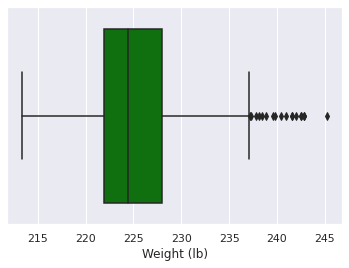

In [ ]:
sns.boxplot(x=df["Weight (lb)"], color="green")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



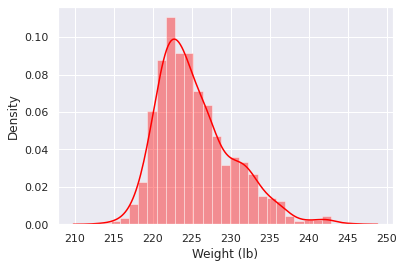

In [ ]:
sns.distplot(df["Weight (lb)"], color="red")

### Time Series Plot

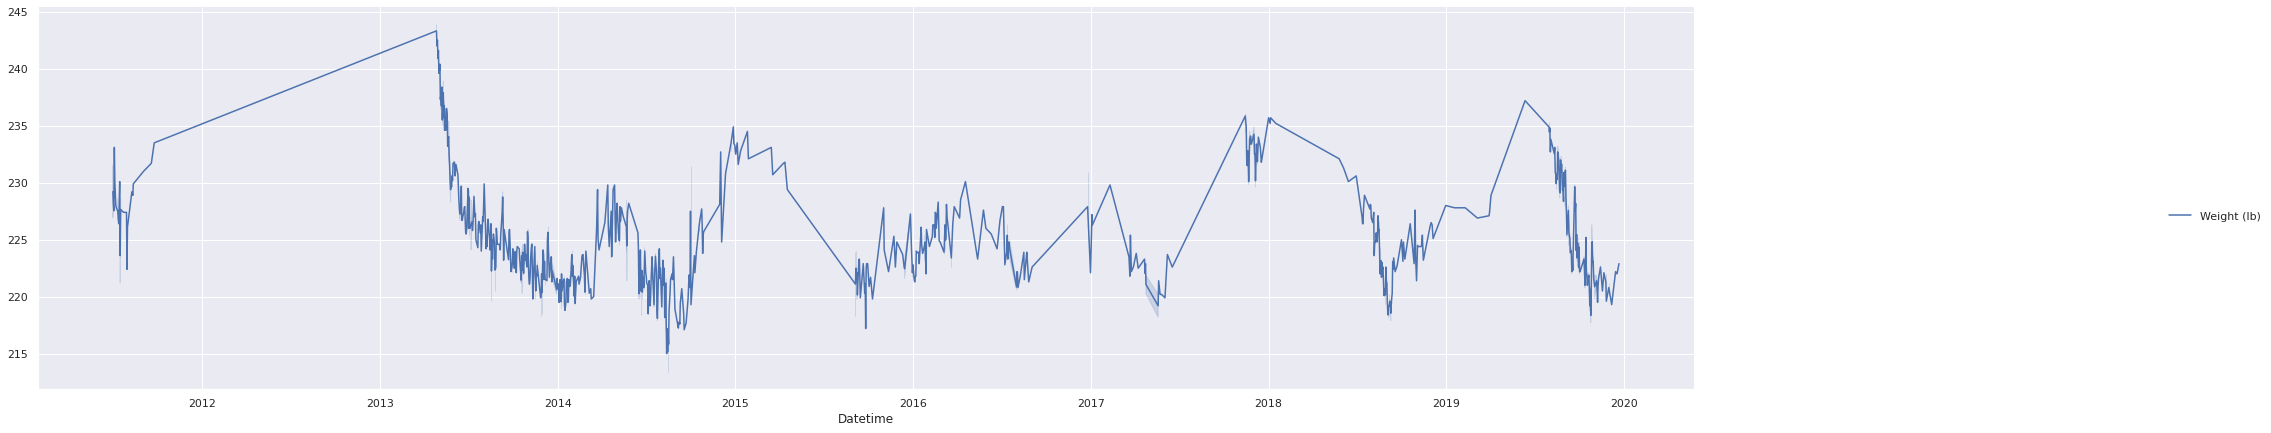

In [ ]:
g = sns.relplot(data=df, kind="line", ci=68)
g.fig.set_size_inches(35,6)
g.set_titles("Body Weight 2011-2019")

This notebook is featured in [Practical MLOps book by O'Reilly](https://learning.oreilly.com/library/view/practical-mlops/9781098103002/) as well a Coursera + Duke Course.

### Clean

In [ ]:
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


,Weight (lb)
Datetime,
2019-12-22 00:00:00,222.900
2019-12-18 00:00:00,222.000
2019-12-15 00:00:00,222.200
2019-12-07 00:00:00,219.300
2019-12-01 00:00:00,220.400


## MLB-EDA

### Ingest-MLB-Data

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.000,22.990
1,Paul_Bako,BAL,Catcher,74,215.000,34.690
2,Ramon_Hernandez,BAL,Catcher,72,210.000,30.780
3,Kevin_Millar,BAL,First_Baseman,72,210.000,35.430
4,Chris_Gomez,BAL,First_Baseman,73,188.000,35.710


Find N/A

In [ ]:
df.shape

(1034, 6)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df = df.dropna()
df.isnull().values.any()

False

In [ ]:
df.shape

(1033, 6)

In [ ]:
df.describe()

,Height(inches),Weight(pounds),Age
count,1033.000,1033.000,1033.000
mean,73.699,201.689,28.738
std,2.306,20.991,4.322
min,67.000,150.000,20.900
25%,72.000,187.000,25.440
50%,74.000,200.000,27.930
75%,75.000,215.000,31.240
max,83.000,290.000,48.520


What about positions?  What can we infer about a typical player from different positions?

In [ ]:
df_positions = df.groupby("Position").median()
df_positions.reset_index(inplace=True)
df_positions

,Position,Height(inches),Weight(pounds),Age
0,Catcher,73.000,205.000,30.060
1,Designated_Hitter,74.500,224.500,29.200
2,First_Baseman,74.000,220.000,28.800
3,Outfielder,73.000,200.000,28.140
4,Relief_Pitcher,74.000,200.000,27.560
5,Second_Baseman,72.000,185.000,28.435
6,Shortstop,72.000,180.000,27.800
7,Starting_Pitcher,74.500,205.000,27.390
8,Third_Baseman,73.000,200.000,27.900


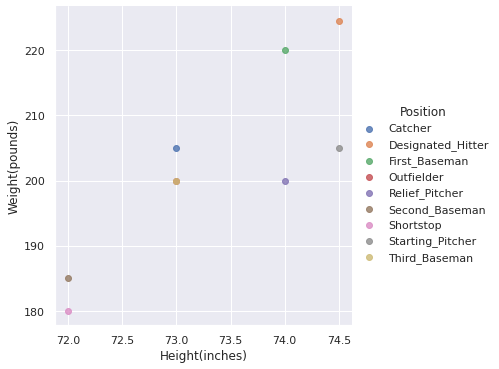

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="Height(inches)", y="Weight(pounds)",data=df_positions, hue="Position")

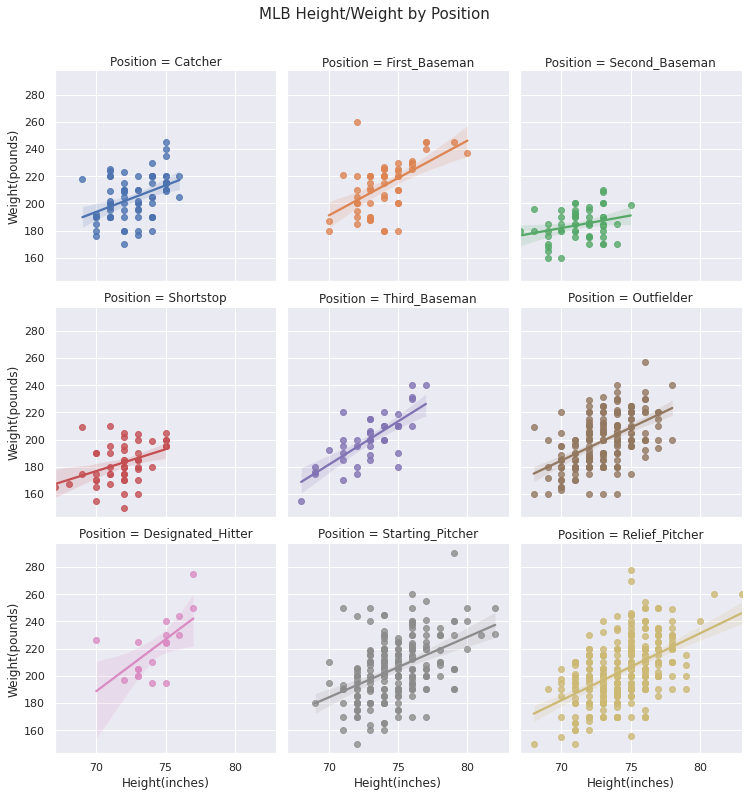

In [ ]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Position", height=3.5, col_wrap=3, hue="Position")
g.fig.suptitle("MLB Height/Weight by Position", fontsize=15, y=1.05)
g.map(sns.regplot, "Height(inches)", "Weight(pounds)")

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Select Feature

Using Weight to Predict Height, so just one feature


In [ ]:
var = df['Height(inches)'].values
var.shape

(1033,)

In [ ]:
y = df['Height(inches)'].values #Target
y = y.reshape(-1, 1)
X = df['Weight(pounds)'].values #Feature(s)
X = X.reshape(-1,1)

In [ ]:
X.shape

(1033, 1)

In [ ]:
y.shape

(1033, 1)

### Split Data and Scale Data

Scaling workflow step by step to make it easier to understand

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X)
X


array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [ ]:
X = X_scaler.transform(X)
X

array([[-1.0337408 ],
       [ 0.6344091 ],
       [ 0.39610197],
       ...,
       [ 0.15779485],
       [-0.55712654],
       [-0.31881941]])

In [ ]:
y_scaler = scaler.fit(y)
y

array([[74],
       [74],
       [72],
       ...,
       [75],
       [75],
       [73]])

In [ ]:
y = y_scaler.transform(y)
y

array([[ 0.13060176],
       [ 0.13060176],
       [-0.73699706],
       ...,
       [ 0.56440117],
       [ 0.56440117],
       [-0.30319765]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(929, 1) (929, 1)
(104, 1) (104, 1)


### Fit the model

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
y_test.shape

(104, 1)

In [ ]:
predictions.shape

(104, 1)

unscaled predictions, converted to DataFrame and described

In [ ]:
df_predictions = pd.DataFrame(predictions)
df.describe()

,Height(inches),Weight(pounds),Age
count,1033.000,1033.000,1033.000
mean,73.699,201.689,28.738
std,2.306,20.991,4.322
min,67.000,150.000,20.900
25%,72.000,187.000,25.440
50%,74.000,200.000,27.930
75%,75.000,215.000,31.240
max,83.000,290.000,48.520


### Plot Predictions

Let's inverse scale back to view predictions in a form we can understand, then plot

In [ ]:
df_inverse_scaled_prediction = pd.DataFrame(y_scaler.inverse_transform(y))
df_inverse_scaled_prediction.describe()

,0
count,1033.000
mean,73.699
std,2.306
min,67.000
25%,72.000
50%,74.000
75%,75.000
max,83.000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Predicted Height')

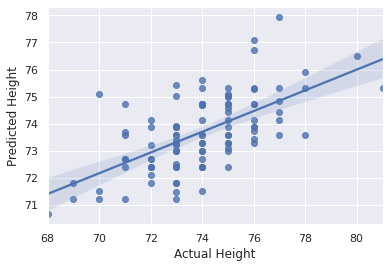

In [ ]:
plot = sns.regplot(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(predictions))
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")

### Print Accuracy of Linear Regression Model

In [ ]:
model.score(X_test, y_test)

0.3704384132736267

## Sugar and Education

### Data Cleaning

#### CDC 2013 Source

TABLE 3. Crude prevalence* of sugar-sweetened beverage† consumption ≥1 time/day among adults, by employment status, education, and state — Behavioral Risk Factor Surveillance System, 23 states and District of Columbia, 2013

https://www.cdc.gov/mmwr/volumes/65/wr/mm6507a1.htm

In [ ]:
import pandas as pd


In [ ]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
cdc_2013.head()

,Employed,Not employed,Retired,<High school,High school,Some college,College graduate
State,,,,,,,
Alaska,26.2 (23.6–28.9),32.1 (27.8–36.8),16.0 (12.6–20.2),47.1 (37.8–56.5),34.9 (31.1–38.9),24.2 (21.0–27.8),12.9 (10.5–15.7)
Arizona,33.0 (28.5–37.8),28.7 (23.5–34.5),13.8 (10.8–17.5),40.4 (30.9–50.7),36.5 (30.7–42.7),24.4 (19.9–29.4),14.6 (11.6–18.3)
California,22.9 (20.9–25.1),30.2 (27.1–33.4),15.0 (12.2–18.2),38.5 (34.2–43.0),29.9 (26.5–33.7),21.4 (18.8–24.2),11.5 (9.8–13.5)
Connecticut,18.9 (17.1–20.9),24.3 (20.8–28.2),15.0 (12.7–17.7),27.8 (22.4–33.9),26.9 (23.7–30.3),19.9 (17.2–23.0),10.2 (8.7–12.0)
District of Columbia,18.5 (15.7–21.7),34.6 (29.5–40.1),18.5 (15.3–22.1),45.6 (36.4–55.2),39.0 (33.1–45.2),28.9 (23.4–35.0),8.4 (7.0–10.1)


In [ ]:
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True) 
cdc_2013.head()
  

,State,Employed,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.200,32.100,16.000,47.100,34.900,24.200,12.900
1,Arizona,33.000,28.700,13.800,40.400,36.500,24.400,14.600
2,California,22.900,30.200,15.000,38.500,29.900,21.400,11.500
3,Connecticut,18.900,24.300,15.000,27.800,26.900,19.900,10.200
4,District of Columbia,18.500,34.600,18.500,45.600,39.000,28.900,8.400


In [ ]:
cdc_2013.describe()

,Employed,Not employed,Retired,<High school,High school,Some college,College graduate
count,24.000,24.000,24.000,24.000,24.000,24.000,24.000
mean,32.325,35.408,18.533,44.662,37.417,30.262,17.358
std,9.918,9.056,5.975,8.589,8.243,8.490,6.730
min,16.700,21.500,8.900,27.800,21.500,16.900,7.800
25%,23.400,29.750,14.625,39.625,31.925,24.200,12.850
50%,31.550,32.600,16.750,46.350,36.750,28.200,15.300
75%,42.025,46.025,22.550,51.200,46.525,39.250,23.500
max,49.700,49.500,29.700,60.000,50.800,47.200,34.900


### Education and Sugar


In [ ]:
!wget https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
!ls -l

--2021-03-24 17:09:04--  https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87688 (86K) [text/plain]
Saving to: ‘us-states.json.2’

us-states.json.2    100%[===================>]  85.63K  --.-KB/s    in 0.005s  

2021-03-24 17:09:04 (17.5 MB/s) - ‘us-states.json.2’ saved [87688/87688]

total 692
-rw-r--r-- 1 root root 432655 Mar 24 12:29 covid-eda.csv
drwxr-xr-x 1 root root   4096 Mar 18 13:36 sample_data
-rw-r--r-- 1 root root  87688 Mar 24 12:28 us-states.json
-rw-r--r-- 1 root root  87688 Mar 24 12:29 us-states.json.1
-rw-r--r-- 1 root root  87688 Mar 24 17:09 us-states.json.2


#### Low Education == High Sugar

In [ ]:
import folium
m = folium.Map(location=[36, -102], zoom_start=3)

folium.Choropleth(
    geo_data="us-states.json",
    name='choropleth',
    data=cdc_2013,
    columns=['State', '<High school'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='<High school Education and Grams Sugar Intake Daily'
).add_to(m)

folium.LayerControl().add_to(m)

m

#### College Education Major Decrease in Sugar Intake

In [ ]:
import folium
m = folium.Map(location=[36, -102], zoom_start=3)

folium.Choropleth(
    geo_data="us-states.json",
    name='choropleth',
    data=cdc_2013,
    columns=['State', 'College graduate'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='College graduate and Grams Sugar Intake Daily'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Median Daily Sugar Intake by Category

In [ ]:
cdc_2013.columns

Index(['State', 'Employed', 'Not employed', 'Retired', '<High school',
       'High school', 'Some college', 'College graduate'],
      dtype='object')

College Graduate

In [ ]:
cdc_2013["College graduate"].median()

15.3

In [ ]:
cdc_2013["<High school"].median()

46.35

Text(0.5, 1.0, 'CDC 2013: Three Times Higher Sugar Intake College vs High School Grads')

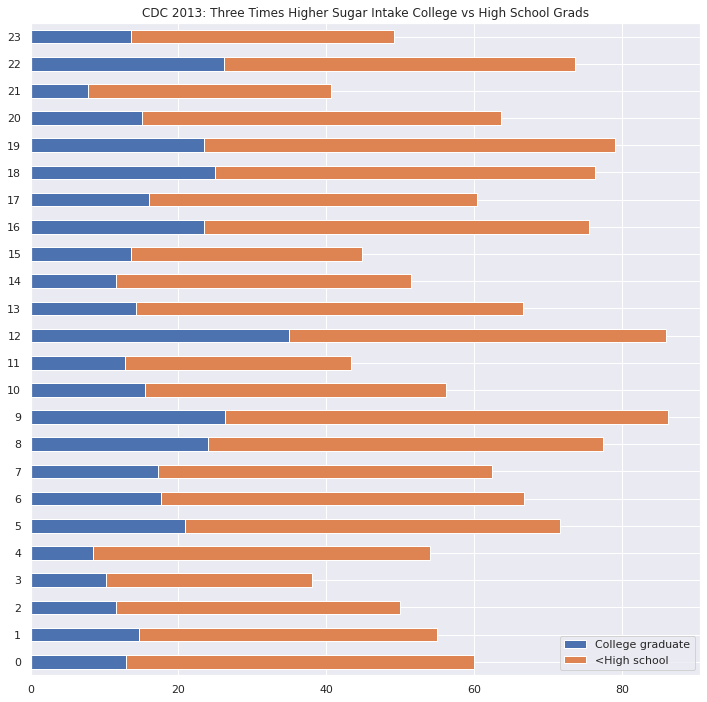

In [ ]:
cdc_2013[["State","College graduate", "<High school"]].plot.barh(
    stacked=True, figsize=(12, 12)).set_title("CDC 2013: Three Times Higher Sugar Intake College vs High School Grads")

## Health and Covid-19

### Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [ ]:
df.tail()

,date,state,fips,cases,deaths
21239,2021-03-23,Virginia,51,607234,10137
21240,2021-03-23,Washington,53,359290,5249
21241,2021-03-23,West Virginia,54,138429,2613
21242,2021-03-23,Wisconsin,55,630040,7241
21243,2021-03-23,Wyoming,56,55799,695


*What are the columns?*

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [ ]:
df.shape

(21244, 5)

### EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [ ]:
df.describe()

,fips,cases,deaths
count,21244.000,21244.000,21244.000
mean,31.932,183853.338,3970.626
std,18.651,359753.044,7144.112
min,1.000,1.000,0.000
25%,17.000,7127.500,148.000
50%,31.000,53145.500,1139.000
75%,46.000,197704.500,4535.500
max,78.000,3648021.000,57909.000


*Cases and Deaths in the USA due to Covid-19*

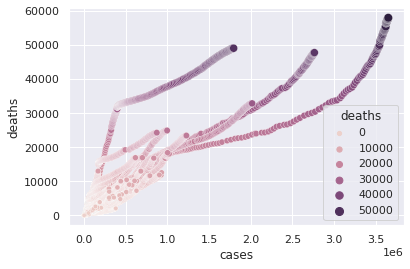

In [ ]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2021-03-23', '2021-03-23', '2021-03-23', '2021-03-23',
               '2021-03-23', '2021-03-23', '2021-03-23', '2021-03-23',
               '2021-03-23', '2021-03-23'],
              dtype='datetime64[ns]', name='date', length=21244, freq=None)

*Filter results by date range*

In [ ]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2021-03-24
Two days ago 2021-03-22


In [ ]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2021-03-22,Alabama,1,511779,10436
2021-03-22,Alaska,2,61034,296
2021-03-22,Arizona,4,836737,16745
2021-03-22,Arkansas,5,328707,5544
2021-03-22,California,6,3645558,57744


*The distribution of the data by date*

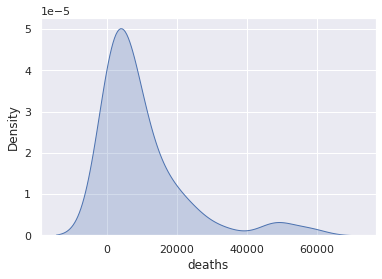

In [ ]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [ ]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2021-03-23,California,6,3648021,57909
2021-03-22,California,6,3645558,57744
2021-03-23,New York,36,1794735,48977
2021-03-22,New York,36,1787934,48959
2021-03-23,Texas,48,2762748,47701
2021-03-22,Texas,48,2758353,47616
2021-03-23,Florida,12,2016505,32819
2021-03-22,Florida,12,2011203,32778
2021-03-23,Pennsylvania,42,997245,24876


*There should be 50 states and District of Columbia*

In [ ]:
current_df.shape

(110, 4)

### State Based Analysis

*Get 10 states and subset*

In [ ]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'New York',
 'New York',
 'Texas',
 'Texas',
 'Florida',
 'Florida',
 'Pennsylvania',
 'Pennsylvania']

In [ ]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [ ]:
set(top_states_df.state.values)

{'California', 'Florida', 'New York', 'Pennsylvania', 'Texas'}

<Figure size 1080x360 with 0 Axes>

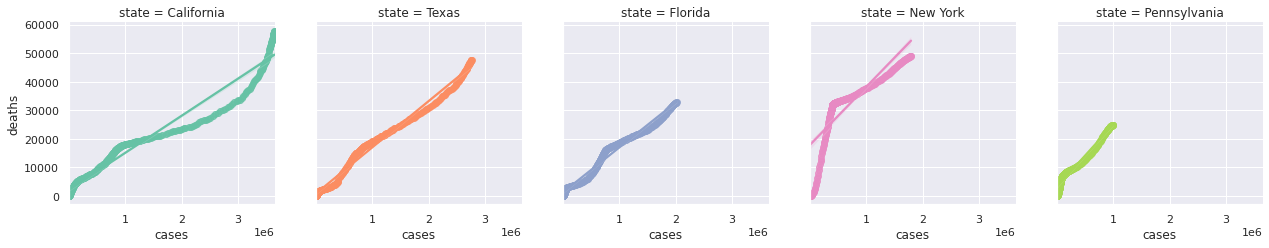

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [ ]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Pennsylvania,6,0
2020-03-09,Pennsylvania,10,0
2020-03-10,Pennsylvania,12,0
2020-03-11,Pennsylvania,16,0
2020-03-12,Pennsylvania,22,0


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [ ]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.200,32.100,16.000,47.100,34.900,24.200,12.900
1,Arizona,33.000,28.700,13.800,40.400,36.500,24.400,14.600
2,California,22.900,30.200,15.000,38.500,29.900,21.400,11.500
3,Connecticut,18.900,24.300,15.000,27.800,26.900,19.900,10.200
4,District of Columbia,18.500,34.600,18.500,45.600,39.000,28.900,8.400


*Combine Sugar Data and Covid-19 Data*

In [ ]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.900
1,California,6,2,0,22.900
2,California,6,2,0,22.900
3,California,6,2,0,22.900
4,California,6,2,0,22.900


*What about data from the 2016 Election?*

In [ ]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,0,1
1,Alaska,Republicans,0,1
2,Arizona,Republicans,0,1
3,Arkansas,Republicans,0,1
4,California,Democrats,1,0


In [ ]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.900,Democrats,1,0
1,California,6,2,0,22.900,Democrats,1,0
2,California,6,2,0,22.900,Democrats,1,0
3,California,6,2,0,22.900,Democrats,1,0
4,California,6,2,0,22.900,Democrats,1,0


*Generate Heatmap*

In [ ]:
sugar_covid_df.corr()

,fips,cases,deaths,employed-sugar-intake-daily,Democrats,Republicans
fips,1.000,-0.108,-0.056,0.268,-0.190,0.190
cases,-0.108,1.000,0.800,-0.112,0.189,-0.189
deaths,-0.056,0.800,1.000,-0.239,0.380,-0.380
employed-sugar-intake-daily,0.268,-0.112,-0.239,1.000,-0.767,0.767
Democrats,-0.190,0.189,0.380,-0.767,1.000,-1.000
Republicans,0.190,-0.189,-0.380,0.767,-1.000,1.000


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(),
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()

In [ ]:
sugar_covid_df.to_csv("covid-eda.csv")

*What about Real-Estate Data?*

## Matthew-Effect-Home-Price-Clustering

Unsupervised Machine Learning technique that discovers hidden labels

#### Exploration of Zillow Home Prices 


##### Ingest

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

Grab data from [Zillow Research](https://www.zillow.com/research/data/)

Example:

https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv

In [ ]:
df = pd.read_csv("https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1384991.000,1368287.000,1360521.000,1357775.000,1352440.000,1346560.000,1339208.000,1334680.000,1330202.000,1322263.000,1317593.000,1319396.000,1317926.000,1314694.000,1302454.000,1292323.000,1285454.000,1285048.000,1286944.000,1293403.000,1289973.000,1286081.000,1269698.000,1256649.000,1246271.000,1237893.000,1243537.000,1250106.000,1258168.000,1255287.000,1251067.000,1243911.000,1242393.000,1243116.000,1249957.000,1253918.000,1256918.000,1260189.000,1255048.000,1247237.000
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,360618.000,359896.000,359345.000,358711.000,357423.000,357109.000,356437.000,357566.000,359301.000,362298.000,365742.000,368474.000,372392.000,375669.000,379582.000,381145.000,384504.000,384797.000,385611.000,383541.000,381211.000,377217.000,373422.000,372083.000,370522.000,370700.000,370619.000,373638.000,376328.000,382076.000,388199.000,...,946425.000,946747.000,952123.000,957862.000,957120.000,957225.000,958563.000,962679.000,962834.000,962252.000,961470.000,962831.000,965927.000,968544.000,967688.000,964783.000,963582.000,963663.000,964723.000,965401.000,966541.000,966851.000,964210.000,961028.000,959208.000,957944.000,960123.000,961340.000,963638.000,964006.000,964280.000,964191.000,965875.000,968256.000,973015.000,978022.000,981918.000,985428.000,987405.000,991571.000
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1669594.000,1653153.000,1644659.000,1648135.000,1655592.000,1662582.000,1665020.000,1667955.000,1674334.000,1676474.000,1674415.000,1670630.000,1665460.000,1660052.000,1647002.000,1634440.000,1625875.000,1619906.000,1614560.000,1601633.000,1589808.000,1579107.000,1570804.000,1558922.000,1547053.000,1537821.000,1541249.000,1544039.000,1543460.000,1538621.000,1533387.000,1534731.000,1533831.000,1534093.000,1534862.000,1541697.000,1549960.000,1557635.000,1558745.000,1558968.000
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200194.000,200441.000,200245.000,199058.000,197922.000,197257.000,198020.000,197708.000,197056.000,196268.000,197167.000,198849.000,201404.000,202646.000,203921.000,206123.000,208577.000,210287.000,209955.000,212096.000,214602.000,216804.000,215873.000,214167.000,211439.000,209831.000,208128.000,207190.000,206153.000,205744.000,205636.000,...,330932.000,331780.000,332630.000,332832.000,332520.000,332853.000,333817.000,334628.000,334722.000,335149.000,335699.000,336106.000,336501.000,335966.000,336262.000,336103.000,336122.000,335061.000,334468.000,334469.000,335367.000,335688.000,336355.000,336456.000,336437.000,335767.000,335398.000,335258.000,335680.000,336298.000,337319.000,338148.000,338871.000,340299.000,341862.000,344329.000,347347.000,351632.000,355788.000,360651.000
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-N

#### Cluster Housing in USA
Rename RegionName to ZipCode and Change Zip Code to String 

In [ ]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df.drop(columns=["RegionID", "RegionType"],inplace=True)
#df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
#df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

,SizeRank,ZipCode,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,...,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,0,10025,NY,NY,New York,New York-Newark-Jersey City,New York County,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1384991.000,1368287.000,1360521.000,1357775.000,1352440.000,1346560.000,1339208.000,1334680.000,1330202.000,1322263.000,1317593.000,1319396.000,1317926.000,1314694.000,1302454.000,1292323.000,1285454.000,1285048.000,1286944.000,1293403.000,1289973.000,1286081.000,1269698.000,1256649.000,1246271.000,1237893.000,1243537.000,1250106.000,1258168.000,1255287.000,1251067.000,1243911.000,1242393.000,1243116.000,1249957.000,1253918.000,1256918.000,1260189.000,1255048.000,1247237.000
1,1,60657,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,360618.000,359896.000,359345.000,358711.000,357423.000,357109.000,356437.000,357566.000,359301.000,362298.000,365742.000,368474.000,372392.000,375669.000,379582.000,381145.000,384504.000,384797.000,385611.000,383541.000,381211.000,377217.000,373422.000,372083.000,370522.000,370700.000,370619.000,373638.000,376328.000,382076.000,388199.000,395603.000,403277.000,...,946425.000,946747.000,952123.000,957862.000,957120.000,957225.000,958563.000,962679.000,962834.000,962252.000,961470.000,962831.000,965927.000,968544.000,967688.000,964783.000,963582.000,963663.000,964723.000,965401.000,966541.000,966851.000,964210.000,961028.000,959208.000,957944.000,960123.000,961340.000,963638.000,964006.000,964280.000,964191.000,965875.000,968256.000,973015.000,978022.000,981918.000,985428.000,987405.000,991571.000
2,2,10023,NY,NY,New York,New York-Newark-Jersey City,New York County,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1669594.000,1653153.000,1644659.000,1648135.000,1655592.000,1662582.000,1665020.000,1667955.000,1674334.000,1676474.000,1674415.000,1670630.000,1665460.000,1660052.000,1647002.000,1634440.000,1625875.000,1619906.000,1614560.000,1601633.000,1589808.000,1579107.000,1570804.000,1558922.000,1547053.000,1537821.000,1541249.000,1544039.000,1543460.000,1538621.000,1533387.000,1534731.000,1533831.000,1534093.000,1534862.000,1541697.000,1549960.000,1557635.000,1558745.000,1558968.000
3,3,77494,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200194.000,200441.000,200245.000,199058.000,197922.000,197257.000,198020.000,197708.000,197056.000,196268.000,197167.000,198849.000,201404.000,202646.000,203921.000,206123.000,208577.000,210287.000,209955.000,212096.000,214602.000,216804.000,215873.000,214167.000,211439.000,209831.000,208128.000,207190.000,206153.000,205744.000,205636.000,204360.000,203847.000,...,330932.000,331780.000,332630.000,332832.000,332520.000,332853.000,333817.000,334628.000,334722.000,335149.000,335699.000,336106.000,336501.000,335966.000,336262.000,336103.000,336122.000,335061.000,334468.000,334469.000,335367.000,335688.000,336355.000,336456.000,336437.000,335767.000,335398.000,335258.000,335680.000,336298.000,337319.000,338148.000,338871.000,340299.000,341862.000,344329.000,347347.000,351632.000,355788.000,360651.000
4,4,60614,IL,IL,Chicago,

In [ ]:
median_prices = df.median()

In [ ]:
median_prices.tail()

2020-10-31   173677.000
2020-11-30   175266.000
2020-12-31   176874.000
2021-01-31   178608.000
2021-02-28   180221.000
dtype: float64

In [ ]:
sf_df = df[df["City"] == "San Francisco"].median()
palo_alto = df[df["City"] == "Palo Alto"].median()
df_comparison = pd.concat([sf_df, palo_alto, median_prices], axis=1)
df_comparison.columns = ["San Francisco", "Palo Alto", "Median USA"]

Setup Plotly and Cufflinks

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
df.go_offline()
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script 
  src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

AttributeError: ignored

##### Effects of Tech Boom, Regressive Taxation and Single-Family Zoning

In [ ]:
enable_plotly_in_cell()
df_comparison.iplot(
                    title="Regressive Taxation and Single Family Zoning 1994-2021",
                    xTitle="Year",
                    yTitle="Sales Price",
                    shape=(3,1),
                    fill=True,)

##### Cluster on Size Rank and Price


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns_to_drop = ['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'StateName']
df_numerical = df.dropna()
df_numerical = df_numerical.drop(columns_to_drop, axis=1)

In [ ]:
df_numerical.columns

In [ ]:
df_numerical.describe()

In [ ]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_numerical)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
print(len(kmeans.labels_))

In [ ]:
cluster_df = df.copy(deep=True)
cluster_df.dropna(inplace=True)
cluster_df.describe()
cluster_df['cluster'] = kmeans.labels_
cluster_df['appreciation_ratio'] = round(cluster_df["2021-01-31"]/cluster_df["1996-01-31"],2)
cluster_df['CityZipCodeAppRatio'] = cluster_df['City'].map(str) + "-" + cluster_df['ZipCode'].map(str) + "-" + cluster_df["appreciation_ratio"].map(str)
cluster_df.head()

###### Socialism for the rich

In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script 
  src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:
enable_plotly_in_cell()
import plotly.offline as py
import plotly.graph_objs as go
trace1 = go.Scatter3d(
    x=cluster_df["appreciation_ratio"],
    y=cluster_df["1996-01-31"],
    z=cluster_df["2021-01-31"],
    mode='markers',
    text=cluster_df["CityZipCodeAppRatio"],
    marker=dict(
        size=12,
        color=cluster_df["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data = [trace1]
layout = go.Layout(
    showlegend=False,
    title="30 Year History USA Real Estate Prices (Clusters Colored)",
    scene = dict(
        xaxis = dict(title='X: Appreciation Ratio'),
        yaxis = dict(title="Y:  1996 Prices"),
        zaxis = dict(title="Z:  2021 Prices"),
    ),
    width=1000,
    height=900,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [ ]:
cluster_df.columns

### AutoML (Why work so hard?)

* Google AutoML Tables
* Amazon Machine Learning
* Azure ML Studio

## Conclusion

**The general public is unaware of many subtle aspects of bodyweight that affect health and longevity. ** Here is a summary of the key facts.


* Life long muscularity could be beneficial
* BMI may too crude of a tool to measure health
* There is evidence to suggest IF (Intermittent Fasting) could be beneficial
* There is evidence of the "Matthew Effect" for weath and health, i.e. the rich get richer and healthier  




**Where did this dataset come from and what can this tell us?**


*Abstract*

We employ a unique dataset of Major League Baseball (MLB) players – a select, healthy population – to examine trends in height, weight, and body mass in birth cohorts from 1869 to 1983. Over that 115-year time period, U.S. born MLB players have gained, on average, approximately 3 in. (7.6 cm) in height and 27.0 lb (12.2 kg) in weight, which has contributed a 1.6-unit increase in the body mass index. Where comparable data are available, U.S. born MLB players are about 2.0 in. (5.1 cm) taller and 20.0 lb (9.1 kg) heavier but substantially less obese than males in the general U.S. population. But both groups exhibit similar height and weight trends; the majority of height and weight gains take place in cohorts that were born prior to World War II, followed by slower gains and occasional declines in height and weight for cohorts born in 1939 and later.


[Historical trends in height, weight, and body mass: Data from U.S. Major League Baseball players, 1869–1983]( https://www.sciencedirect.com/science/article/pii/S1570677X08000324?via%3Dihub)


*Abstract*

*Results*: Compared to 20‐year‐old U.S. males, MLB players can expect almost five additional years of life. Height, weight, handedness, and player ratings are unassociated with the risk of death in this population of highly active and successful adults. Career length is inversely associated with the risk of death, likely because those who play longer gain additional incomes, physical fitness, and training.

*Conclusions:* Our results indicate improvements in life expectancies with time for all age groups and indicate possible improvements in longevity in the general U.S. population.


[Major League Baseball Players' Life Expectancies](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6237.2008.00562.x)

### What else can we investigate?

* Age and Weight Gain
* Muscle mass and longevity
* Wealth and life expectency
* [Intermittent Fasting and Healthy Body Weight](https://noahgift.com/articles/datascience-meets-intermittent-fasting/)